# **Data Analysis with NY Airbnb Listings**

To showcase my data analysis skills in python, I am writing this data analysis script to: 

1. **Data Cleaning**: identify missing values or peculiatities in the data and fix them when possible. 
2. **Data Visualization**: Visualize the data and preexisting relationships between vvalues. 



## **Data Importing**

In [160]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [161]:
#setting up the working directory based on the location of this script
import os 
print(os.getcwd())
os.listdir()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/rebeccahess/Documents/projects/freeCodeCamp/data_analysis_with_python


['.DS_Store', 'iris_data.ipynb', 'NY-airbnb.ipynb', 'NY airbnb data']

In [162]:
#importing the data 
listings = pd.read_csv('NY airbnb data/listings.csv')
neighborhoods = pd.read_csv('NY airbnb data/neighbourhoods.csv')
reviews = pd.read_csv('NY airbnb data/reviews.csv')

## **Data Exploration**

**Data Exploration : Listings.csv**

In [163]:
listings.describe()
listings.info()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.240000e+02,4.240000e+02,0.0,424.000000,424.000000,374.000000,424.000000,424.000000,366.000000,424.000000,424.000000,424.000000,0.0
mean,6.907163e+17,2.386313e+08,NaN,42.657833,-73.776658,110.042781,5.693396,59.174528,1.987077,6.174528,233.261792,15.837264,NaN
std,5.017984e+17,1.959192e+08,NaN,0.009929,0.019287,86.746145,9.627107,106.754453,1.981654,6.372051,119.275432,21.751757,NaN
min,2.992450e+06,6.576000e+04,NaN,42.630660,-73.876490,24.000000,1.000000,0.000000,0.040000,1.000000,0.000000,0.000000,NaN
25%,5.196373e+07,4.762598e+07,NaN,42.652047,-73.789767,68.000000,1.000000,4.000000,0.490000,1.000000,119.750000,1.000000,NaN
50%,8.415244e+17,1.891330e+08,NaN,42.656976,-73.773065,93.000000,2.000000,19.000000,1.350000,3.000000,268.000000,7.000000,NaN
75%,1.128346e+18,3.976121e+08,NaN,42.663191,-73.763191,122.750000,3.000000,67.250000,2.942500,9.000000,341.250000,22.250000,NaN
max,1.365429e+18,6.773730e+08,NaN,42.714900,-73.738250,882.000000,70.000000,900.000000,10.980000,23.000000,365.000000,130.000000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              424 non-null    int64  
 1   name                            424 non-null    object 
 2   host_id                         424 non-null    int64  
 3   host_name                       423 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   424 non-null    object 
 6   latitude                        424 non-null    float64
 7   longitude                       424 non-null    float64
 8   room_type                       424 non-null    object 
 9   price                           374 non-null    float64
 10  minimum_nights                  424 non-null    int64  
 11  number_of_reviews               424 non-null    int64  
 12  last_review                     366 

In [164]:
#checking for missing values in columns 
pct_missing=pd.Series(listings.isnull().sum() / len(listings)) * 100
pct_missing[pct_missing > 0].sort_values(ascending=False)
pct_missing

#checking for missing values in rows
# we know that 100% are missing the neighbourhood_group and license do lets look at the other values 
# the question I am trying to answer is are the null values random or are they concentrated in certain rows. 
listings.loc[
    listings.isnull().sum(axis=1)>2, 
    pct_missing[pct_missing > 0].index
].drop(['license', 'neighbourhood_group'], axis=1).head(10)


#checking the number of missing values grouped in each row, excluding the neighbourhood_group and license columns
missing = listings.drop(columns=pct_missing[pct_missing == 100].index).isnull()
# Group by the set of missing columns
missing_sets = (missing.apply(lambda x: ", ".join(x[x].index), axis=1)
                .value_counts()
                .reset_index())
missing_sets.columns = ['missing_cols', 'count']

#pandas formatting options to display all columns and rows
pd.set_option('display.width', 0)            # No fixed width limit
pd.set_option('display.max_colwidth', None)  # Don't truncate column contents
print(missing_sets)

#it looks like the reviews data is missing as a group. Ths begs the question can the review data be supplemented with the reviews.csv.
#price is missing unrelated to reviews -- > This might just be because there are no reviews for the listing.

neighbourhood_group    100.000000
license                100.000000
last_review             13.679245
reviews_per_month       13.679245
price                   11.792453
host_name                0.235849
dtype: float64

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.235849
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                              11.792453
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        13.679245
reviews_per_month                  13.679245
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64

,host_name,price,last_review,reviews_per_month
15,Argus,243.0,NaN,NaN
18,Argus,180.0,NaN,NaN
19,Michael,155.0,NaN,NaN
21,Fabiola,37.0,NaN,NaN
22,Argus,186.0,NaN,NaN
23,Peter,NaN,2024-10-19,0.24
24,Jessica,NaN,2022-11-30,0.10
25,David,NaN,2022-12-31,0.08
26,Lloyd,NaN,2025-02-16,2.77
27,Allen,NaN,2025-02-17,1.59


                            missing_cols  count
0                                           323
1         last_review, reviews_per_month     50
2                                  price     42
3  price, last_review, reviews_per_month      8
4                              host_name      1


In [165]:
#checking for duplicates
listings['id'].duplicated() # not seeing any duplicates --> nothing to resolve


0      False
1      False
2      False
3      False
4      False
       ...  
419    False
420    False
421    False
422    False
423    False
Name: id, Length: 424, dtype: bool

**Data Exploration: neighbourhoods.csv**

In [166]:
reviews.describe()
reviews.info()
reviews.head(10)

#This data is already included in the listings data.

,listing_id
count,2.509000e+04
mean,2.305090e+17
std,3.980084e+17
min,2.992450e+06
25%,2.554956e+07
50%,4.426543e+07
75%,6.100908e+17
max,1.350872e+18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25090 entries, 0 to 25089
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  25090 non-null  int64 
 1   date        25090 non-null  object
dtypes: int64(1), object(1)
memory usage: 392.2+ KB


,listing_id,date
0,2992450,2014-07-01
1,2992450,2014-10-24
2,2992450,2015-03-04
3,2992450,2015-03-25
4,2992450,2015-06-23
5,2992450,2015-07-19
6,2992450,2015-12-31
7,2992450,2021-09-22
8,2992450,2022-08-17
9,3820211,2014-08-15


**Data Exploration: neighbourhoods.csv**

In [167]:
neighborhoods.describe()
neighborhoods.info()
#so we are meant to pull neighbourhood_group from the neighbourhoods data.

print(neighborhoods['neighbourhood_group'].value_counts())
#nevermind this is not a useful column.
neighborhoods.head()
# same thing with the listings data, we have neightborhood but no neightborhood_group.
# but this means that all the heavy lifting has been done for us.

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        15 non-null     object 
dtypes: float64(1), object(1)
memory usage: 388.0+ bytes
Series([], Name: count, dtype: int64)


,neighbourhood_group,neighbourhood
0,NaN,EIGHTH WARD
1,NaN,ELEVENTH WARD
2,NaN,FIFTEENTH WARD
3,NaN,FIFTH WARD
4,NaN,FIRST WARD


In [168]:
# now for a decisive moment on whether to remove the data with missing values. The question is do we care about reviews and price?
# I think we do care about reviews and price.
# so we will remove the rows with missing values.
# we will also remove the columns with 100% missing values.

#lets look at the data again to confirm data types while we are moving towards the final data set.
listings.info()
listings.describe()
listings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              424 non-null    int64  
 1   name                            424 non-null    object 
 2   host_id                         424 non-null    int64  
 3   host_name                       423 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   424 non-null    object 
 6   latitude                        424 non-null    float64
 7   longitude                       424 non-null    float64
 8   room_type                       424 non-null    object 
 9   price                           374 non-null    float64
 10  minimum_nights                  424 non-null    int64  
 11  number_of_reviews               424 non-null    int64  
 12  last_review                     366 

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.240000e+02,4.240000e+02,0.0,424.000000,424.000000,374.000000,424.000000,424.000000,366.000000,424.000000,424.000000,424.000000,0.0
mean,6.907163e+17,2.386313e+08,NaN,42.657833,-73.776658,110.042781,5.693396,59.174528,1.987077,6.174528,233.261792,15.837264,NaN
std,5.017984e+17,1.959192e+08,NaN,0.009929,0.019287,86.746145,9.627107,106.754453,1.981654,6.372051,119.275432,21.751757,NaN
min,2.992450e+06,6.576000e+04,NaN,42.630660,-73.876490,24.000000,1.000000,0.000000,0.040000,1.000000,0.000000,0.000000,NaN
25%,5.196373e+07,4.762598e+07,NaN,42.652047,-73.789767,68.000000,1.000000,4.000000,0.490000,1.000000,119.750000,1.000000,NaN
50%,8.415244e+17,1.891330e+08,NaN,42.656976,-73.773065,93.000000,2.000000,19.000000,1.350000,3.000000,268.000000,7.000000,NaN
75%,1.128346e+18,3.976121e+08,NaN,42.663191,-73.763191,122.750000,3.000000,67.250000,2.942500,9.000000,341.250000,22.250000,NaN
max,1.365429e+18,6.773730e+08,NaN,42.714900,-73.738250,882.000000,70.000000,900.000000,10.980000,23.000000,365.000000,130.000000,NaN


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,621960198566758900,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,NaN,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,NaN
1,932642358896439621,Stylish top floor apt w/parking,232967878,Diana,NaN,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,NaN
2,53567589,Private Garden Apt in Downtown Albany|Pets Allowed,433096110,Brian,NaN,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,NaN
3,20671966,The Metropolitan,98744672,Bela,NaN,NINTH WARD,42.65532,-73.78244,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,NaN
4,24606880,The Western Suite,98744672,Bela,NaN,NINTH WARD,42.65431,-73.78178,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,NaN


## **Data Cleaning**

Resolving missing data.

Columns I want to remove:
1. neighbourhood_group
2. license 

I want to make the index the id. 


Host id would be a valuable way to calculate the number of airbnb's by host name is not likely to be unique like host_id. 

--> We could use host id and location to forward fill price, forward filling reviews is debatable. 

--> maybe first identify whether there is a preexisting relationship between **host_id** and **price** 

Remove duplicate data.




In [169]:
#removing the columns with 100% missing values
#I am going to call the new data set listings_clean
listings_clean = listings.drop(columns=['license', 'neighbourhood_group'])

In [170]:
#setting id to be the index
listings_clean = listings_clean.set_index('id')

In [171]:
#looking for a relationship between price and the other columns
missing_or_zero_count = (listings_clean['price'].isnull() | (listings_clean['price'] == 0)).sum()

print(missing_or_zero_count) 
#those are the rows with missing values in the price column.

# Step 1: Find host_ids that have at least one missing listing, this is a list of host_ids
hosts_with_missing = listings_clean[listings_clean['price'].isnull()]['host_id'].unique()

# Step 2: Keep ALL listings for these host_ids
listings_missing_hosts = listings_clean.loc[
    listings_clean['host_id'].isin(hosts_with_missing), ['price', 'host_id', 'neighbourhood', 'room_type']
].sort_values(by='host_id')

# not very helpful. We cant see that much of a correlation with limited view.
#calculate some summary statistics for the listings with missing host_ids. 

listings_clean.groupby(['neighbourhood', 'room_type'])['price'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index().sort_values(by='mean', ascending=True)
#too much variation in the data to make any conclusions. Lets just drop the rows with missing values.
listings_clean = listings_clean.dropna(subset=['price'])
print(listings_missing_hosts)  



50


,neighbourhood,room_type,count,mean,std,min,max
5,FIFTEENTH WARD,Private room,3,42.000000,4.582576,38.0,47.0
3,ELEVENTH WARD,Private room,7,43.571429,9.071147,32.0,55.0
18,SEVENTH WARD,Private room,1,50.000000,NaN,50.0,50.0
24,THIRD WARD,Private room,5,51.800000,24.355697,36.0,92.0
28,TWELFTH WARD,Private room,1,54.000000,NaN,54.0,54.0
10,FOURTEENTH WARD,Private room,10,60.800000,7.997222,52.0,70.0
1,EIGHTH WARD,Private room,3,62.333333,16.165808,53.0,81.0
14,NINTH WARD,Private room,14,62.785714,31.894486,24.0,134.0
26,THIRTEENTH WARD,Private room,17,63.000000,25.541633,36.0,123.0
22,TENTH WARD,Private room,22,68.954545,42.371910,33.0,186.0


                     price    host_id    neighbourhood        room_type
id                                                                     
1121699903906738345   90.0    1761578       SIXTH WARD  Entire home/apt
653433851241162365   130.0    1761578       SIXTH WARD  Entire home/apt
849460179246794510     NaN    1761578       SIXTH WARD  Entire home/apt
703551649845095095     NaN    3650672  THIRTEENTH WARD  Entire home/apt
21449583             582.0    4259750   FIFTEENTH WARD  Entire home/apt
...                    ...        ...              ...              ...
1018268869882592471  102.0  528617680      SECOND WARD  Entire home/apt
950613505102507073     NaN  529844022       FIRST WARD  Entire home/apt
1108060100336766656    NaN  539608284       THIRD WARD     Private room
1142828940864329671    NaN  574235481       FIRST WARD  Entire home/apt
1284983740417509877    NaN  661066080      FOURTH WARD  Entire home/apt

[125 rows x 4 columns]


## **Data Visualization**

Now that I have resolved the missing data for price and removed unhelpful / empty columns, we can start with some visualization.
The first thing I think would be interesting is a correlation map -- lets see if there are any relationships between columsn. 

I think it would be interesting to see the prices per area using a geographic map. 



<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Listings Data')

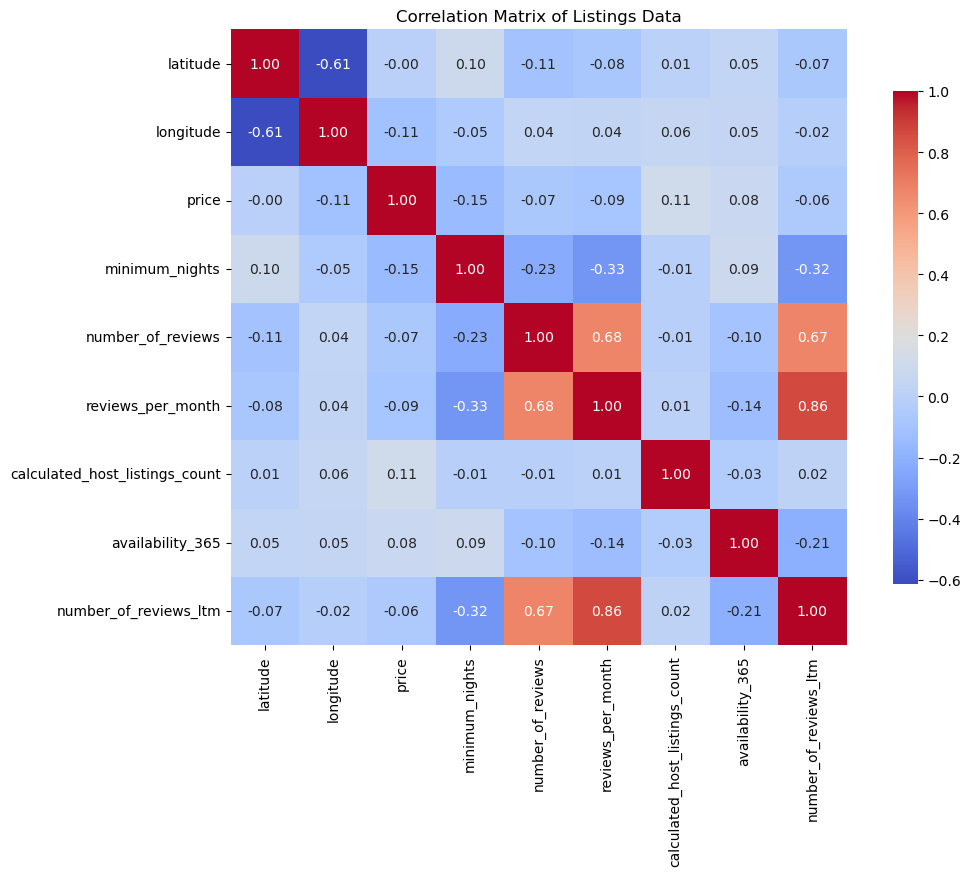

In [172]:
#constructing a correlation matrix to see if there are any relationships between the columns
# to avoid using identifiers in the correlation matrix, I'm going to convert them to objects. 
listings_clean['host_id'] = listings_clean['host_id'].astype(object)
#select only the numeric columns for the correlation matrix
numeric_listings = listings_clean[listings_clean.select_dtypes(include=['int', 'float']).columns]
corr_matrix = numeric_listings.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Listings Data')
plt.show()

There is not a lot that we can conclude from the correlation heat map. Reviews per month and minimum nights has some correlation but I think that just may be that when the minimum night requirement is higher, the less reviews they have because they have less people renting the airbnb. 


(array([17., 52., 57., 58., 70., 37., 23., 16., 10.,  6.,  4.,  6.,  2.,
         3.,  2.,  0.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 24.  ,  41.16,  58.32,  75.48,  92.64, 109.8 , 126.96, 144.12,
        161.28, 178.44, 195.6 , 212.76, 229.92, 247.08, 264.24, 281.4 ,
        298.56, 315.72, 332.88, 350.04, 367.2 , 384.36, 401.52, 418.68,
        435.84, 453.  , 470.16, 487.32, 504.48, 521.64, 538.8 , 555.96,
        573.12, 590.28, 607.44, 624.6 , 641.76, 658.92, 676.08, 693.24,
        710.4 , 727.56, 744.72, 761.88, 779.04, 796.2 , 813.36, 830.52,
        847.68, 864.84, 882.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Price')

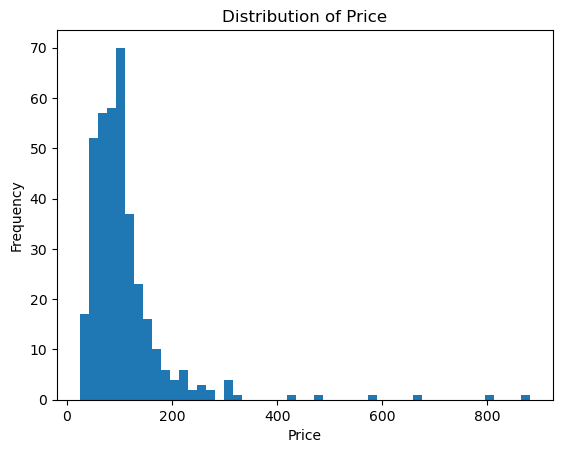

In [173]:
plt.hist(listings_clean['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

             city      city_ascii state_id  state_name  county_fips  \
0   Prairie Ridge   Prairie Ridge       WA  Washington        53053   
1          Edison          Edison       WA  Washington        53057   
2        Packwood        Packwood       WA  Washington        53041   
3  Wautauga Beach  Wautauga Beach       WA  Washington        53035   
4          Harper          Harper       WA  Washington        53035   

  county_name      lat       lng  population  population_proper  density  \
0      Pierce  47.1443 -122.1408         NaN                NaN   1349.8   
1      Skagit  48.5602 -122.4311         NaN                NaN    127.4   
2       Lewis  46.6085 -121.6702         NaN                NaN    213.9   
3      Kitsap  47.5862 -122.5482         NaN                NaN    261.7   
4      Kitsap  47.5207 -122.5196         NaN                NaN    342.1   

    source  incorporated             timezone         zips          id  
0  polygon         False  America/Los_Angel

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,geometry
id,,,,,,,,,,,,,,,,
621960198566758900,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,FOURTEENTH WARD,42.667620,-73.799190,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,POINT (-73.79919 42.66762)
932642358896439621,Stylish top floor apt w/parking,232967878,Diana,THIRTEENTH WARD,42.672240,-73.793010,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,POINT (-73.79301 42.67224)
53567589,Private Garden Apt in Downtown Albany|Pets Allowed,433096110,Brian,SIXTH WARD,42.652040,-73.766550,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,POINT (-73.76655 42.65204)
20671966,The Metropolitan,98744672,Bela,NINTH WARD,42.655320,-73.782440,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,POINT (-73.78244 42.65532)
24606880,The Western Suite,98744672,Bela,NINTH WARD,42.654310,-73.781780,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,POINT (-73.78178 42.65431)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312449079141263102,COZY house,667142820,Sylvain Marco,FIFTEENTH WARD,42.669459,-73.826925,Entire home/apt,250.0,30,0,NaN,NaN,1,364,0,POINT (-73.82692 42.66946)
1273861365984558378,Short term across from UAlbany,658588120,Melinda,TWELFTH WARD,42.686851,-73.814056,Entire home/apt,60.0,28,0,NaN,NaN,1,267,0,POINT (-73.81406 42.68685)
1350831900774924999,Cozy Home in Heart of Albany,677372979,Celia,TWELFTH WARD,42.685078,-73.797640,Entire home/apt,129.0,2,0,NaN,NaN,1,200,0,POINT (-73.79764 42.68508)


<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Albany Listings by Price and Neighbourhood')

Text(0.5, 179.5528751718132, 'Longitude')

Text(94.84722222222221, 0.5, 'Latitude')

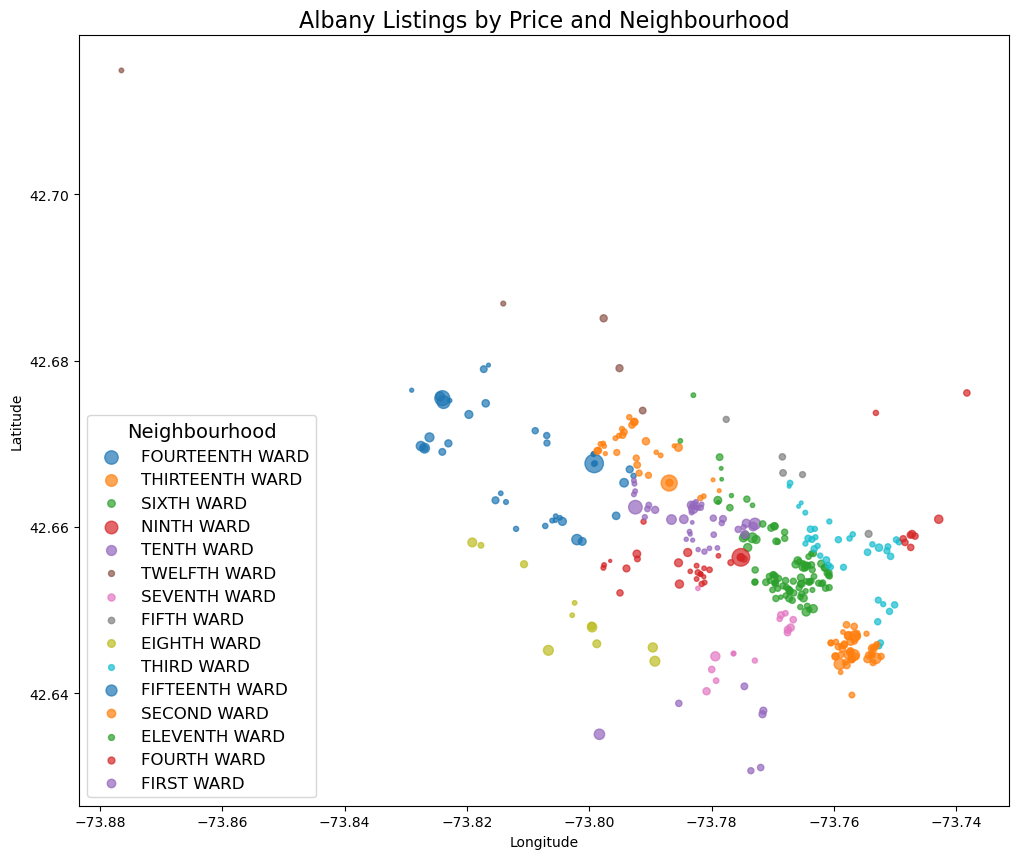

In [177]:
#geopandas map of price by longitude and latitude
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx  # Optional for basemap

# Download US cities (simple CSV)
url = "https://simplemaps.com/static/data/us-cities/uscitiesv1.5.csv"

cities = pd.read_csv(url)

# Check it out
print(cities.head())

# Filter Albany
albany = cities[(cities['city'] == 'Albany') & (cities['state_id'] == 'NY')]
# Plot the world map

# Create geometry column
geometry = [Point(xy) for xy in zip(listings_clean['longitude'], listings_clean['latitude'])]

# Convert to GeoDataFrame
listings_gdf = gpd.GeoDataFrame(listings_clean, geometry=geometry)
listings_gdf.set_crs(epsg=4326, inplace=True)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot each neighborhood separately with a different color
neighbourhoods = listings_gdf['neighbourhood'].unique()

for neighbourhood in neighbourhoods:
    subset = listings_gdf[listings_gdf['neighbourhood'] == neighbourhood]
    subset.plot(
        ax=ax,
        markersize=subset['price'] / 5,  # Scale price for size
        label=neighbourhood,              # Add label for legend
        alpha=0.7
    )



# Customize the plot
plt.title('Albany Listings by Price and Neighbourhood', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', fontsize=12, title_fontsize=14)
plt.show()

